## Convolutional Neural Networks

##### A convolutional neural network (CNN or ConvNet) is a network architecture for deep learning that learns directly from data.

##### In some context, the word convolution is a simple multiplication of frequency domains

### Objectives

- Build an artificial neural network (ANN) model using the convolutional neural network (CNN) architecture
- Use the classifier to classify images (male and female)
- Perform comparison analysis on some of the model parameters


![image](images/cnn_image.jpg)

In [1]:
# Import libraries - pandas, numpy, matplotlib, keras, tensorflow, 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from comtypes.GUID import binary
from sklearn.metrics import accuracy_score

In [2]:
# Import Dataset
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

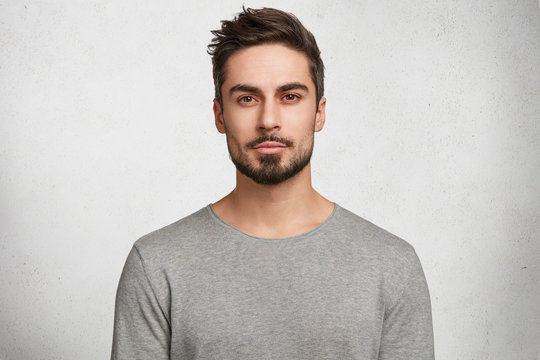

In [3]:
sample_data = image.load_img('ImageData\Training\Males\male_1.jpg')
sample_data

In [4]:
dataset = ImageDataGenerator(rescale = 1/255)

In [5]:
# Analyze dataset
dataset = dataset.flow_from_directory('ImageData\Training', target_size=(200, 200), batch_size=1, class_mode='binary')

Found 34 images belonging to 2 classes.


In [6]:
dataset.class_indices

{'Females': 0, 'Males': 1}

In [7]:
dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [8]:
dataset.image_shape

(200, 200, 3)

In [9]:
# Build CNN Model
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D

model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=dataset.image_shape))
model.add(MaxPool2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\Lenovo\miniconda3\envs\dsenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [10]:
# Compile CNN Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
# Fit CNN Model
model.fit(dataset, epochs=10)

Epoch 1/10


C:\Users\Lenovo\miniconda3\envs\dsenv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - accuracy: 0.5833 - loss: 2.1171    
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.6220 - loss: 0.6825 
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.4918 - loss: 0.6818     
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.5962 - loss: 0.6893 
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.8084 - loss: 0.6692 
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.8694 - loss: 0.4288 
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9449 - loss: 0.3169 
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.9937 - loss: 0.0741      
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 1.0000 - loss: 0.0966  
Epoch 10/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 1.0000 - loss: 0.0013     


In [12]:
test_image = image.load_img('lect.jpg', target_size=(200,200))

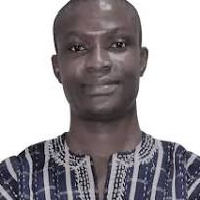

In [13]:
test_image

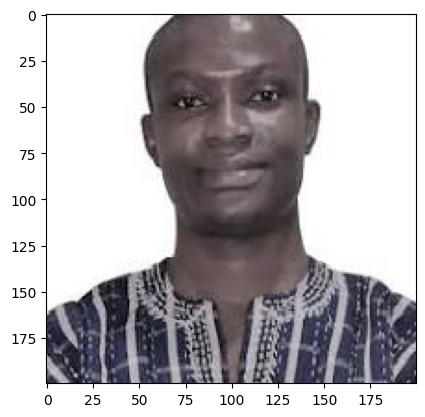

In [14]:
plt.imshow(test_image)

In [15]:
test_image = image.img_to_array(test_image)

In [16]:
test_image

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[ 89.,  87.,  98.],
        [ 79.,  77.,  88.],
        [ 48.,  46.,  57.],
        ...,
        [ 27.,  26.,  42.],
        [ 56.,  55.,  71.],
        [ 15.,  14.,  30.]],

       [[ 67.,  65.,  76.],
        [ 65.,  63.,  74.],
        [ 57.,  55.,  66.],
        ...,
        [ 49.,  48.,  64.],
        [ 56.,  55.,  71.],
        [ 29.,  28.,  44.]],

       [[ 46.,  44.,  55.],
        [ 46.,  44.,  55.],
        [ 59.,  

In [17]:
final_image = test_image / 255

In [18]:
final_image

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.34901962, 0.34117648, 0.38431373],
        [0.30980393, 0.3019608 , 0.34509805],
        [0.1882353 , 0

In [19]:
final_image = np.expand_dims(final_image, axis=0)

In [20]:
final_image.shape

(1, 200, 200, 3)

In [21]:
model.predict(final_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


array([[0.27808365]], dtype=float32)

In [23]:
# Build CNN Model
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D

model2 = Sequential()
model2.add(Conv2D(16, (3, 3), activation='relu', input_shape=dataset.image_shape))
model2.add(MaxPool2D(2, 2))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPool2D(2, 2))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPool2D(2, 2))
model2.add(Flatten())
model2.add(Dense(200, activation='relu'))
model2.add(Dense(2, activation='softmax'))

In [24]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
model2.fit(dataset, epochs=10)

Epoch 1/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.9256 - loss: 0.1125      
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9591 - loss: 0.0589      
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9467 - loss: 0.1781    
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 1.0000 - loss: 0.0180      
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 1.0000 - loss: 0.0034 
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 1.0000 - loss: 2.5636e-04 
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 1.0000 - loss: 2.8742e-04 
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 1.0000 - loss: 6.9686e-05 
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 1.0000 - loss: 1.2307e-04  
Epoch 10/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 1.0000 - loss: 1.9207e-04  


In [27]:
dean_image = image.load_img('kauf.jpg', target_size=(200,200)) 

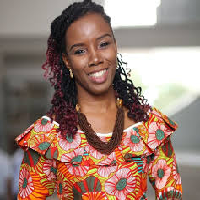

In [28]:
dean_image

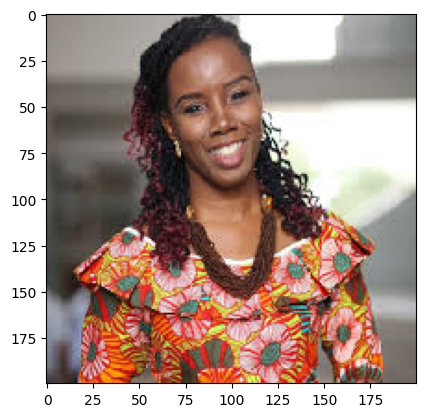

In [30]:
plt.imshow(dean_image)

In [31]:
dean_image = image.img_to_array(dean_image)

In [32]:
dean_image

array([[[143., 136., 130.],
        [143., 136., 130.],
        [144., 137., 131.],
        ...,
        [123., 127., 126.],
        [122., 126., 125.],
        [121., 125., 124.]],

       [[143., 136., 130.],
        [144., 137., 131.],
        [144., 137., 131.],
        ...,
        [123., 127., 126.],
        [122., 126., 125.],
        [121., 125., 124.]],

       [[144., 137., 131.],
        [144., 137., 131.],
        [145., 138., 132.],
        ...,
        [122., 126., 125.],
        [122., 126., 125.],
        [121., 125., 124.]],

       ...,

       [[ 70.,  69.,  74.],
        [ 70.,  70.,  72.],
        [ 69.,  69.,  71.],
        ...,
        [113., 106., 100.],
        [113., 106., 100.],
        [114., 107., 101.]],

       [[ 64.,  63.,  68.],
        [ 64.,  64.,  66.],
        [ 64.,  64.,  66.],
        ...,
        [112., 105.,  99.],
        [113., 106., 100.],
        [113., 106., 100.]],

       [[ 58.,  57.,  62.],
        [ 59.,  59.,  61.],
        [ 59.,  

In [33]:
final_deanimage = dean_image / 255

In [34]:
final_deanimage

array([[[0.56078434, 0.53333336, 0.50980395],
        [0.56078434, 0.53333336, 0.50980395],
        [0.5647059 , 0.5372549 , 0.5137255 ],
        ...,
        [0.48235294, 0.49803922, 0.49411765],
        [0.47843137, 0.49411765, 0.49019608],
        [0.4745098 , 0.49019608, 0.4862745 ]],

       [[0.56078434, 0.53333336, 0.50980395],
        [0.5647059 , 0.5372549 , 0.5137255 ],
        [0.5647059 , 0.5372549 , 0.5137255 ],
        ...,
        [0.48235294, 0.49803922, 0.49411765],
        [0.47843137, 0.49411765, 0.49019608],
        [0.4745098 , 0.49019608, 0.4862745 ]],

       [[0.5647059 , 0.5372549 , 0.5137255 ],
        [0.5647059 , 0.5372549 , 0.5137255 ],
        [0.5686275 , 0.5411765 , 0.5176471 ],
        ...,
        [0.47843137, 0.49411765, 0.49019608],
        [0.47843137, 0.49411765, 0.49019608],
        [0.4745098 , 0.49019608, 0.4862745 ]],

       ...,

       [[0.27450982, 0.27058825, 0.2901961 ],
        [0.27450982, 0.27450982, 0.28235295],
        [0.27058825, 0

In [39]:
final_deanimage = np.expand_dims(dean_image, axis=0)

In [40]:
final_deanimage.shape

(1, 200, 200, 3)

In [41]:
model2.predict(final_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


array([[0.0470721, 0.9529279]], dtype=float32)

In [42]:
model2.predict(final_deanimage)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


array([[1., 0.]], dtype=float32)

In [43]:
model.save('model1.h5')

In [44]:
model2.save('model2.h5')